# **Práctica 4: Clasificación semi-supervisada**
* **Master:** Inteligencia Computacional y Internet de las Cosas
* **Asignatura:** Clasificación Non-Convencional
* **Estudiante:** Mabrouka Salmi
* **Fecha:** 14-03-2023
* **El Cuaderno Colab de la [Práctica](https://colab.research.google.com/drive/1I6nIOY9Ii_NrEt7HeBflJX-EJdOhAz4b?usp=sharing)**

---
**Realizamos la práctica de clasificación semi siguiendo las dos opciónes**

**La primera opción: Implementación de Algoritmo**

✔ Self-Training Algorithm

**La segunda opción de comparación de métodos**

  ✔ Enfoques y Algoritmos seleccionados: Algorthmic methods ➡ Classifier based approach

      ▶ EM
      ▶ Self-training
  ✔ Datasets seleccionados: We simulated semi-supervised data by elimination a percentage of labels from the training subset

  ---
  ***Note: We opted for both options just to improve our understanding of the topic***


> 🔰 **Nota:**  Intenté traducir los textos del cuaderno, sin embargo no pude comprobar si mantiene el mismo significado, agradeceré su comprensión y tiempo  

# **1. Loading and preparing three datasets**

In [ ]:
%%bash
wget https://raw.githubusercontent.com/johng034/customer-segmentation/master/marketing_campaign.csv

--2024-03-11 12:26:32--  https://raw.githubusercontent.com/johng034/customer-segmentation/master/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217947 (213K) [text/plain]
Saving to: ‘marketing_campaign.csv.1’

     0K .......... .......... .......... .......... .......... 23% 3.68M 0s
    50K .......... .......... .......... .......... .......... 46% 4.71M 0s
   100K .......... .......... .......... .......... .......... 70% 27.2M 0s
   150K .......... .......... .......... .......... .......... 93% 5.14M 0s
   200K .......... ..                                         100%  170M=0.03s

2024-03-11 12:26:33 (5.94 MB/s) - ‘marketing_campaign.csv.1’ saved [217947/217947]



In [ ]:
Marketing_df=pd.read_csv('/content/marketing_campaign.csv', sep=',')
Marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The marketing campaign has three categorical variables: 'Marital_Status', 'Dt_Customer', 'Education'

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Marketing_df['Marital_Status'] = labelEncoder.fit_transform(Marketing_df['Marital_Status'])
Marketing_df['Dt_Customer'] = labelEncoder.fit_transform(Marketing_df['Dt_Customer'])
Marketing_df['Education'] = labelEncoder.fit_transform(Marketing_df['Education'])
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We notice the null values in the variable `Income`, We choose to drop the rows containing Null values from the dataset

In [ ]:
Marketing_df=Marketing_df.dropna()
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   int64  
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
%%bash
# https://www.kaggle.com/datasets/omnamahshivai/surgical-dataset-binary-classification?select=Surgical-deepnet.csv
wget https://raw.githubusercontent.com/gtrane/Predicting-Postoperative-Complications/main/Raw%20Data/Surgical-deepnet.csv

--2024-03-11 12:26:56--  https://raw.githubusercontent.com/gtrane/Predicting-Postoperative-Complications/main/Raw%20Data/Surgical-deepnet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1230003 (1.2M) [text/plain]
Saving to: ‘Surgical-deepnet.csv.1’

     0K .......... .......... .......... .......... ..........  4% 4.10M 0s
    50K .......... .......... .......... .......... ..........  8% 5.32M 0s
   100K .......... .......... .......... .......... .......... 12% 27.9M 0s
   150K .......... .......... .......... .......... .......... 16% 17.8M 0s
   200K .......... .......... .......... .......... .......... 20% 6.82M 0s
   250K .......... .......... .......... .......... .......... 24%  236M 0s
   300K .......... .......... .......... .......... .....

In [ ]:
surgical_df = pd.read_csv("/content/Surgical-deepnet.csv", sep=',')

In [ ]:
surgical_df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


Check the data information: type of variables

In [ ]:
surgical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [ ]:
%%bash
#wget https://datahub.io/machine-learning/diabetes/r/diabetes.csv
#wget https://github.com/plotly/datasets/blob/master/diabetes.csv
wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2024-03-11 12:27:15--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

     0K .......... .......... ...                             100% 14.3M=0.002s

2024-03-11 12:27:15 (14.3 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
diabetes = pd.read_csv("/content/diabetes.csv", sep=',')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report # for model evaluation metrics


# **2. Implementation of Self-training Algorithm**

In [ ]:
# Shuffle the data

surgical_df = surgical_df.sample(frac=1, random_state=15).reset_index(drop=True)


# Generate indices for splits

test_ind = round(len(surgical_df)*0.25) # indices of the test data 25%
train_ind = test_ind + round(len(surgical_df)*0.01) # indices for train data 1%
unlabeled_ind = train_ind + round(len(surgical_df)*0.74)  # indices the data points to unlabel 74%


# Partition the data

test = surgical_df.iloc[:test_ind] # using the generated indices we get the test data from the whole dataset
train = surgical_df.iloc[test_ind:train_ind] # using the indices of the train data (1% labeled) to get the train data from the surgical dataset
unlabeled = surgical_df.iloc[train_ind:unlabeled_ind] # using the indices of the unlabeled data points to get the unlabaled set


# Assign data to train, test, and unlabeled sets

X_train = train.drop('complication', axis=1)
y_train = train.complication

X_unlabeled = unlabeled.drop('complication', axis=1)

X_test = test.drop('complication', axis=1)
y_test = test.complication


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (146, 24)
y_train dimensions: (146,)

X_test dimensions: (3659, 24)
y_test dimensions: (3659,)

X_unlabeled dimensions: (10830, 24)


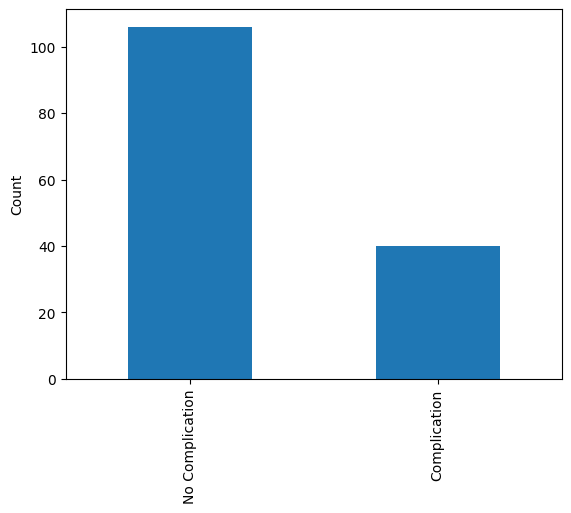

In [ ]:
# Visualize class distribution

y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['No Complication', 'Complication'])
plt.ylabel('Count');

From the bar plot, we notice the imbalance in the class distribution of the dataset `Surgical-deepnet`. The `complication` class is less than the half of the `No complication` class.

* We should take in consideration the clas imbalance in the evaluation of the built classification model. Hence, we use f1-score because it measure the trade-off between the recall and the precision.

## **The Algorithm Procedures: Self-Training Classifier (Semi-Supervised)**

Coding the self-training classifier follows this outline:

* **Step 1:** First, train a Logistic Regression classifier on the labeled training data.

* **Step 2:** Next, use the classifier to predict labels for all unlabeled data, as well as probabilities for those predictions. Of these predicted class labels, the ones with the highest probability of being correct are adopted as `pseudo-labels`

* **Step 3**: Concatenate the `pseudo-labeled` data with the labeled training data, and re-train the classifier on the concatenated data.

* **Step 4:** Use trained classifier to make predictions for the labeled test data, and evaluate the classifier.

Repeat steps 1 through 4 until no more predictions have greater than 99% probability, or no unlabeled data remains.

In [ ]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1]

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:

    # Fit classifier and make train/test predictions
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index

    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)

    print(f"{len(high_prob)} high-probability predictions added to training data.")

    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])

    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    # Update iteration counter
    iterations += 1

Iteration 0
Train f1: 0.5846153846153846
Test f1: 0.500873616773442
Now predicting labels for unlabeled data...
42 high-probability predictions added to training data.
10788 unlabeled instances remaining.

Iteration 1
Train f1: 0.7627118644067796
Test f1: 0.5037463976945246
Now predicting labels for unlabeled data...
30 high-probability predictions added to training data.
10758 unlabeled instances remaining.

Iteration 2
Train f1: 0.8181818181818182
Test f1: 0.5062857142857143
Now predicting labels for unlabeled data...
20 high-probability predictions added to training data.
10738 unlabeled instances remaining.

Iteration 3
Train f1: 0.8457142857142856
Test f1: 0.5073947667804324
Now predicting labels for unlabeled data...
22 high-probability predictions added to training data.
10716 unlabeled instances remaining.

Iteration 4
Train f1: 0.8601036269430052
Test f1: 0.5087818696883853
Now predicting labels for unlabeled data...
21 high-probability predictions added to training data.
1069

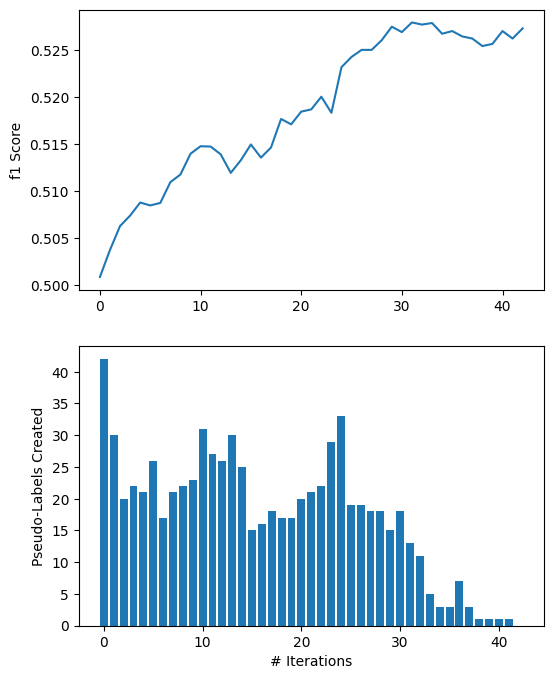

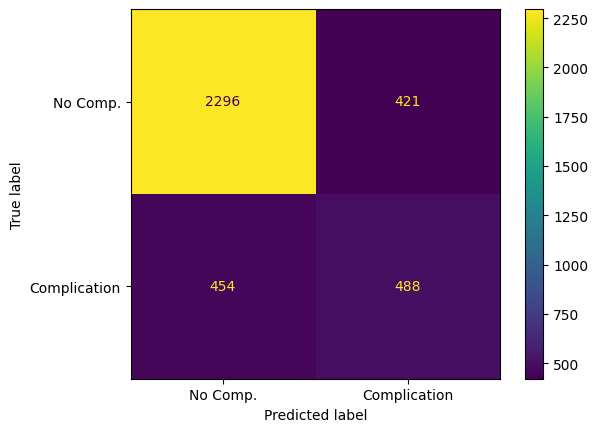

In [ ]:
# Plot f1 scores and number of pseudo-labels added for all iterations
from sklearn.metrics import ConfusionMatrixDisplay
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');
predictions = clf.predict(X_test)
conf_m = confusion_matrix(predictions, y_test)
# View confusion matrix after self-training
cm_display = ConfusionMatrixDisplay(conf_m,display_labels=['No Comp.', 'Complication'])
cm_display.plot()
plt.show()

Evaluation using metrics: Accuracy, Recall, Precision, F1-score, Area under ROC curve

In [ ]:
# Evaluation of the implemented self-training model on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc_ = accuracy_score(y_test, predictions)
Prec_ = precision_score(y_test, predictions)
Rec_ = recall_score(y_test, predictions)
Fscore_ = f1_score(y_test, predictions)
Auc_ = roc_auc_score(y_test, predictions)
print("Accuracy = ", acc_)
print("Precision = ", Prec_)
print("Recall = ", Rec_)
print("F1-score = ", Fscore_)
print("Area uner ROC curve = ", Auc_)

Accuracy =  0.7608636239409675
Precision =  0.5180467091295117
Recall =  0.5368536853685368
F1-score =  0.5272825499729876
Area uner ROC curve =  0.6858813881388138


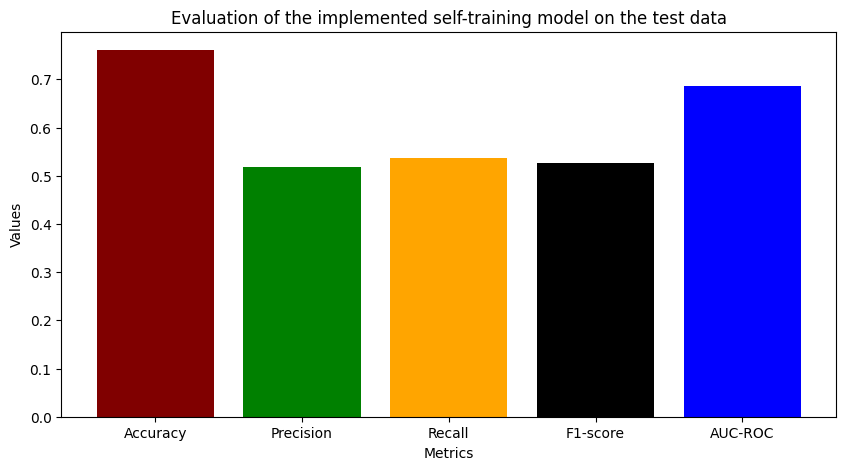

In [ ]:
eval = {'Accuracy':0.7608636239409675, 'Precision':0.5180467091295117,
        'Recall':0.5368536853685368, 'F1-score':0.5272825499729876,
        'AUC-ROC':0.6858813881388138 }
metrics = list(eval.keys())
scores = list(eval.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(metrics, scores, color =['maroon', 'green', 'orange', 'black', 'blue'])

plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation of the implemented self-training model on the test data")
plt.show()

## **Discussion and Conclusion**

> **About the data:** The dataset of surgical complications presents surgery cases and their characteristics along with the related complications whether exist ot not. We noticed a class imbalance in the train data (labeled) that represents 1% of the whole data, as seen in the class distribution above.

> **Preprocessing:** As our main objective is to handle the task of classification through semi-labeled data, we only treated the missing values in the data by eliminating them.

> **Implemented Self-traing classifier:** we followed 4 steps in the implementation of the self-training classifier. First, we split the data into train-test with ratio 75%-25% respectively. The data was completely labeled, so we eliminated 74% of the labels of the train data and only 1% of the train data remained labeled. Second, we trained a logistic regression classifier on the labeled train data, and we predict the unlabeled train data with the trained logistic regression model. We get the predictions and the probabilities associated, only the predictions of unlabeled data associated with a high probability `>99%` are added to the labeled train data which are called as `pseudo labeled`. The process of the logistic regression training, predictions, filtering the prediction based on the probabilities, and adding them to the train data is realised in one iteration. This iteration is repeated untill there is no remaining unlabeled data. During the process of generating the pseudo-labels, the `f1-score` was calculated on the labeled train data and the test data, which we plotted earlier.

> **Conclusion:** We notice that the implemented model achieved 76% `accuracy` and and Area under the ROC curve (`AUC-ROC`) of 68% which refers to the average to good overall performance of the model on the test data. However, the `recall` and the `precision` metrics are of average values 53% and 52% respectively, which is due to the severe imbalance in the main surgical dataset. Consequently, the model doesn't pay attention to the minority instances as the majority instances, although in this medical context, we are more interested in the identification of the surgery cases having complications. Hence, the class imbalance in the semisupervised learning is a critical problem that needs handling, else it could lead to a model ignoring the minority instances by misclassifying them as majority instances. Hence, the value `f1-score` is average as well since it is the harmonic average of the recall and the precision. The experimentation and evaluation of the implemented self-training model on the surgical complication dataset release the relative performance of the model taking into account the class imbalance of the used dataset.

> **Future Research Directions:** The process of generating the `pseudo-labels` should be optimized to correctly label the unlabeled training instances. I suggest to use a genetic algorithm to optimize the classifier performance on a labeled validation set, like that if the `optimized-pseudo-labels` are chosed with one objective that is maximization of the f1-score of the model on the validation data (another metrics could be used depending on the context). The built **Evolutionary learning based self-training algorithm** or **"Optimized Self-training Algorithm"** involve a maximization process to generate `pseudo-labels` while its training on the labeled training data. Then a test set is put aside to be used in the performance evaluation step.



# **3. Comparative Analysis of Semi-supervised Algorithms**
▶ **Self-Training Algorithm**

▶ **EM**

## **Self-Training Algorithm**

### **Application on Marketing Campaign Data**

In [ ]:
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   int64  
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
Marketing_df['Z_CostContact'].nunique()
print("The number of unique values in the variable Z_CosContact")
def unique_values(df):
  cols = df.columns
  #Nunique_values=[]
  dic = dict()
  for c in cols:
    nuni_values =df[c].nunique()
    #Nunique_values.append(nuni_values)
    dic[c] =nuni_values
  return dic



The number of unique values in the variable Z_CosContact


In [ ]:
unique_val = unique_values(Marketing_df)
unique_val

{'ID': 2216,
 'Year_Birth': 59,
 'Education': 5,
 'Marital_Status': 8,
 'Income': 1974,
 'Kidhome': 3,
 'Teenhome': 3,
 'Dt_Customer': 662,
 'Recency': 100,
 'MntWines': 776,
 'MntFruits': 158,
 'MntMeatProducts': 554,
 'MntFishProducts': 182,
 'MntSweetProducts': 176,
 'MntGoldProds': 212,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 15,
 'NumCatalogPurchases': 14,
 'NumStorePurchases': 14,
 'NumWebVisitsMonth': 16,
 'AcceptedCmp3': 2,
 'AcceptedCmp4': 2,
 'AcceptedCmp5': 2,
 'AcceptedCmp1': 2,
 'AcceptedCmp2': 2,
 'Complain': 2,
 'Z_CostContact': 1,
 'Z_Revenue': 1,
 'Response': 2}

We see that the variables `Z_CostContact` and `Z_Revenue` are constant, having one value for all the instance in the dataset. As a result they don't contribute to the prediction of the response of the marketing claim. In the following, we drop both variables.

In [ ]:
Marketing_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1,inplace=True)
# Check the variables are dropped
Marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   int64  
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

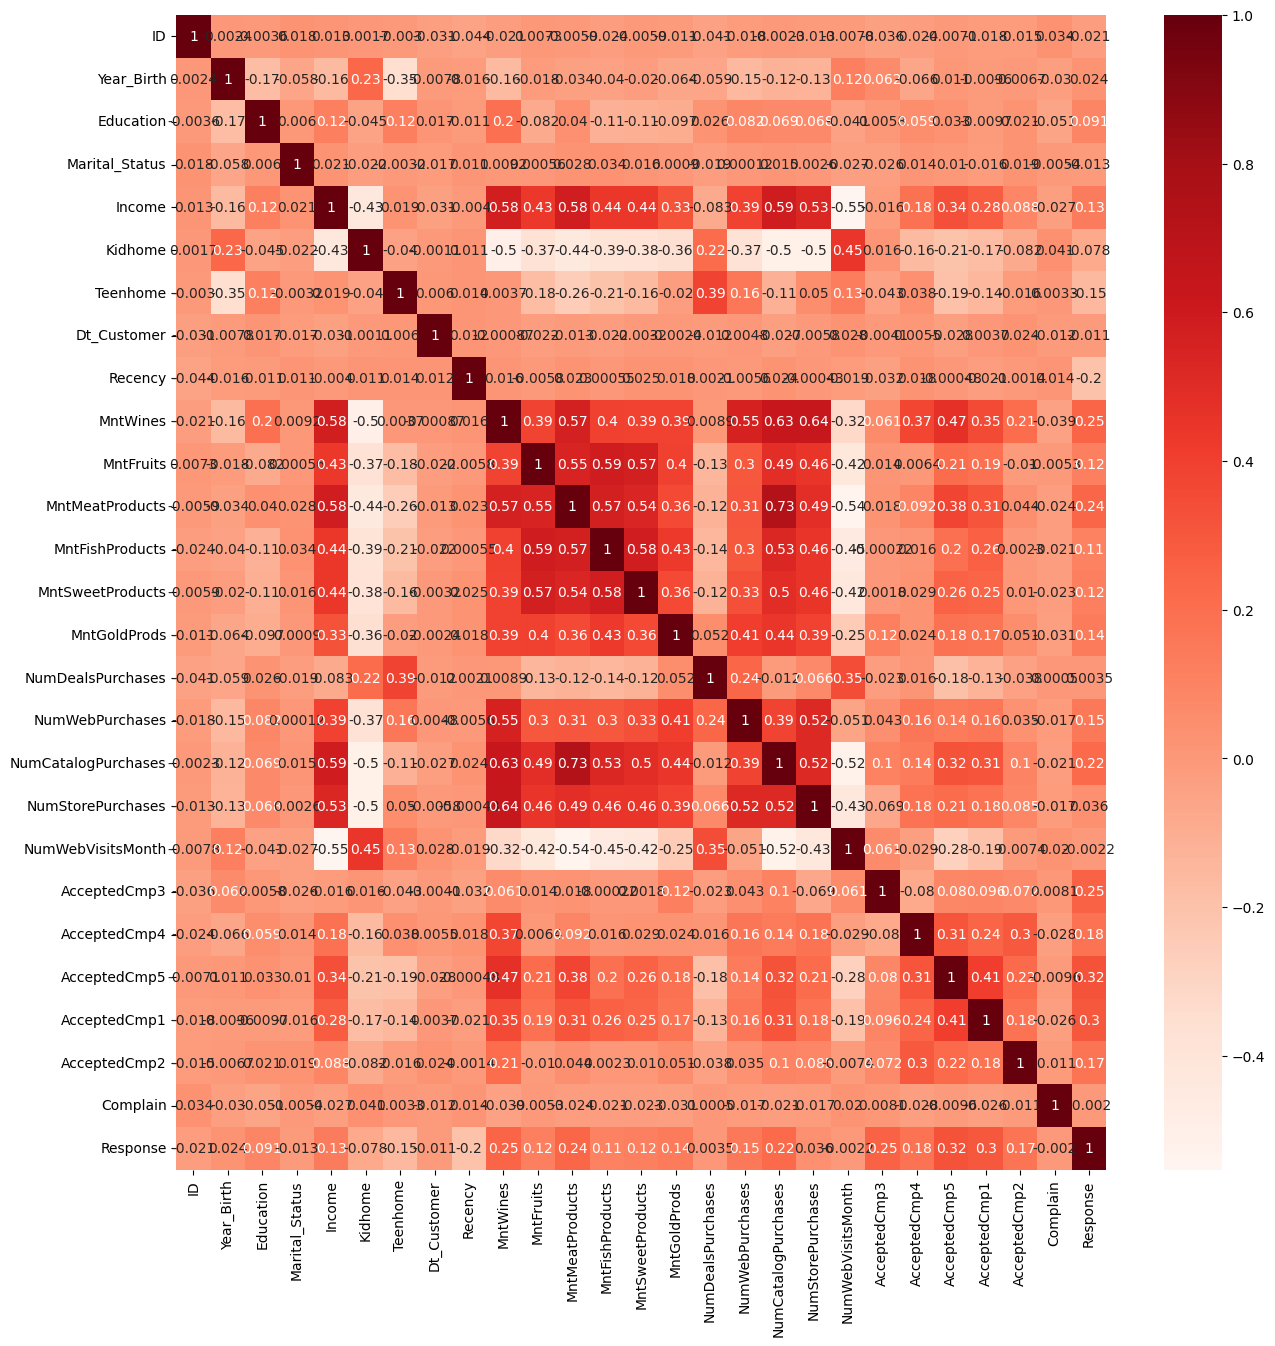

In [ ]:
import seaborn as sns
corr = Marketing_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

We choose features mostly correlated with the target feature

In [ ]:
#Correlation with output variable
cor_target = abs(corr["Response"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
AcceptedCmp3           0.254005
AcceptedCmp5           0.323374
AcceptedCmp1           0.297345
Response               1.000000
Name: Response, dtype: float64

In [ ]:
#X_marketing =Marketing_df.drop('Response', axis =1)
X_marketing=Marketing_df[['MntMeatProducts', 'MntWines','NumCatalogPurchases','AcceptedCmp3', 'AcceptedCmp5','AcceptedCmp1']]
y_marketing = Marketing_df['Response']

In [ ]:
y_marketing.unique()

array([1, 0])

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train_mark, X_test_mark, y_train_mark, y_test_mark = train_test_split(X_marketing, y_marketing, stratify=y_marketing, test_size = 0.25, random_state=0)

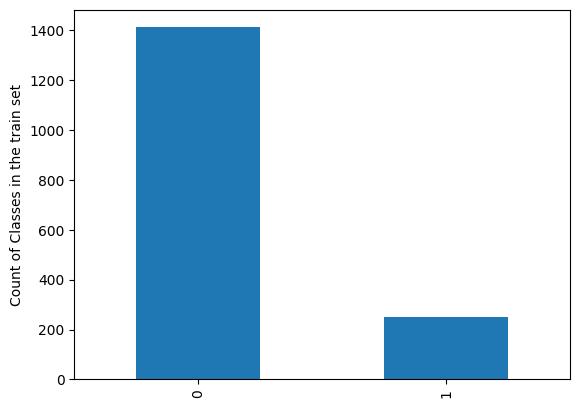

In [ ]:
y_train_mark.value_counts().plot(kind='bar')
plt.xticks([0,1], ['0', '1'])
plt.ylabel('Count of Classes in the train set');

The train data is severely imbalanced as seen in the class distribution plot. The minority class represented less 25% of the majority class

In [ ]:
# make it semi-supervised TASK
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(y_train_mark.shape[0]) < 0.9
y_train_mark[random_unlabeled_points] = -1

In [ ]:
print(y_train_mark.value_counts())

-1    1495
 0     145
 1      22
Name: Response, dtype: int64


In [ ]:
# Specify SVC model parameters
model_svc = SVC(kernel='rbf',
                probability=True, # Need to enable to be able to use predict_proba
                C=1.0, # default = 1.0
                gamma='scale', # default = 'scale',
                random_state=0
               )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train_mark, y_train_mark)


End of iteration 1, added 1451 new labels.
End of iteration 2, added 37 new labels.
End of iteration 3, added 3 new labels.


In [ ]:
########## Step 3 - Model Evaluation ##########
print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Feature Names: ', clf_ST.feature_names_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test_mark, y_test_mark)
print('Accuracy Score: ', accuracy_score_ST)
# Look at classification report to evaluate the model
print(classification_report(y_test_mark, clf_ST.predict(X_test_mark)))


---------- Self Training Model - Summary ----------
Base Estimator:  SVC(probability=True, random_state=0)
Classes:  [0 1]
Transduction Labels:  [0 0 0 ... 0 1 0]
Number of Features:  6
Feature Names:  ['MntMeatProducts' 'MntWines' 'NumCatalogPurchases' 'AcceptedCmp3'
 'AcceptedCmp5' 'AcceptedCmp1']
Number of Iterations:  4
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.8447653429602888
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       471
           1       0.38      0.06      0.10        83

    accuracy                           0.84       554
   macro avg       0.62      0.52      0.51       554
weighted avg       0.79      0.84      0.79       554



In [ ]:
# Predict with  the trained model
pred_mark = clf_ST.predict(X_test_mark)
cm_mark = confusion_matrix(y_test_mark,pred_mark)
print(cm_mark)

[[463   8]
 [ 78   5]]


As expected, the minority class is unfrequently present in the train data, for that the model didn't learn to classify it appropriately.

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc_ST_mark = accuracy_score(y_test_mark, pred_mark)
Prec_ST_mark = precision_score(y_test_mark, pred_mark)
Rec_ST_mark = recall_score(y_test_mark, pred_mark)
Fscore_ST_mark = f1_score(y_test_mark, pred_mark)
Auc_ST_mark = roc_auc_score(y_test_mark, pred_mark)
print("Accuracy = ", acc_ST_mark)
print("Precision = ", Prec_ST_mark)
print("Recall = ", Rec_ST_mark)
print("F1-score = ", Fscore_ST_mark)
print("Area uner ROC curve = ", Auc_ST_mark)

Accuracy =  0.8447653429602888
Precision =  0.38461538461538464
Recall =  0.060240963855421686
F1-score =  0.10416666666666667
Area uner ROC curve =  0.5216279129255877


**Interpretation:** Although the accuracy value is very good of 84%, the model poorely performed in the classification of the minority class. It only classifier 6% of the minority instances correctly, besides the precision tells about the percentage of the positive instances that were classified correctly among the negative instances that falsely predicted as postive. Consequently, the f1-score has a low value. The area under the ROC curve indicate the low performance of the model in the test data that is almost as random classification. We clearly notice the impact of the class imbalance on the slef-training algorithm. As commented previously, further investigation on this data issue should be carried out.

### **Application on the Surgey Deepnet Dataset**

In [ ]:
X_sur = surgical_df.drop("complication", axis=1)
y_sur = surgical_df['complication']

In [ ]:
print("shape the surgical complication dataset ",surgical_df.shape)

shape the surgical complication dataset  (14635, 25)


In [ ]:
y_sur.unique()

array([0, 1])

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train_surg, X_test_surg, y_train_surg, y_test_surg = train_test_split(X_sur, y_sur, stratify=y_sur, test_size = 0.3)

In [ ]:
# make it semi-supervised TASK
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(y_train_surg.shape[0]) < 0.9
y_train_surg[random_unlabeled_points] = -1

In [ ]:
print(y_train_surg.value_counts())

-1    9263
 0     736
 1     245
Name: complication, dtype: int64


In [ ]:
# Specify SVC model parameters
model_svc = SVC(kernel='rbf',
                probability=True, # Need to enable to be able to use predict_proba
                C=1.0, # default = 1.0
                gamma='scale', # default = 'scale',
                random_state=0
               )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train_surg, y_train_surg)


End of iteration 1, added 7711 new labels.
End of iteration 2, added 1200 new labels.
End of iteration 3, added 162 new labels.
End of iteration 4, added 48 new labels.
End of iteration 5, added 10 new labels.
End of iteration 6, added 2 new labels.
End of iteration 7, added 1 new labels.


In [ ]:
########## Step 3 - Model Evaluation ##########
print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Feature Names: ', clf_ST.feature_names_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test_surg, y_test_surg)
print('Accuracy Score: ', accuracy_score_ST)
# Look at classification report to evaluate the model
print(classification_report(y_test_surg, clf_ST.predict(X_test_surg)))


---------- Self Training Model - Summary ----------
Base Estimator:  SVC(probability=True, random_state=0)
Classes:  [0 1]
Transduction Labels:  [0 1 0 ... 0 0 0]
Number of Features:  24
Feature Names:  ['bmi' 'Age' 'asa_status' 'baseline_cancer' 'baseline_charlson'
 'baseline_cvd' 'baseline_dementia' 'baseline_diabetes'
 'baseline_digestive' 'baseline_osteoart' 'baseline_psych'
 'baseline_pulmonary' 'ahrq_ccs' 'ccsComplicationRate' 'ccsMort30Rate'
 'complication_rsi' 'dow' 'gender' 'hour' 'month' 'moonphase' 'mort30'
 'mortality_rsi' 'race']
Number of Iterations:  9
Termination Condition:  no_change

---------- Self Training Model - Evaluation on Test Data ----------
Accuracy Score:  0.7649738100660441
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      3284
           1       0.70      0.12      0.20      1107

    accuracy                           0.76      4391
   macro avg       0.73      0.55      0.53      4391
weighted avg  

In [ ]:
# Predict with  the trained model
pred_surg = clf_ST.predict(X_test_surg)
cm_surg = confusion_matrix(y_test_surg,pred_surg)
print(cm_surg)

[[3226   58]
 [ 974  133]]


In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc_ST_surg = accuracy_score(y_test_surg, pred_surg)
Prec_ST_surg = precision_score(y_test_surg, pred_surg)
Rec_ST_surg = recall_score(y_test_surg, pred_surg)
Fscore_ST_surg = f1_score(y_test_surg, pred_surg)
Auc_ST_surg = roc_auc_score(y_test_surg, pred_surg)
print("Accuracy = ", acc_ST_surg)
print("Precision = ", Prec_ST_surg)
print("Recall = ", Rec_ST_surg)
print("F1-score = ", Fscore_ST_surg)
print("Area uner ROC curve = ", Auc_ST_surg)

Accuracy =  0.7649738100660441
Precision =  0.6963350785340314
Recall =  0.12014453477868112
F1-score =  0.2049306625577812
Area uner ROC curve =  0.5512415731140665


**Interpretation:** The class imbalance in deteriorating the classification performance of the slef-training algorithm on the test data. Since we kept the original class distribution in the train data as in the test data, the unlabeled train data were randomly generated, which could affect the class distribution present in the labeled train data, and yet significantly augment the impact of the class imbalance. For example, if only 25% of the train data are representing the minority class, and the randomly unlabeled instances are representing 74% of the training data (75%) this may generate a train data with only one class. The accuracy value here is good due to the correct classification of one class while the other class `complication` is identified with 12% ratio. The area under the ROC curve unveil the poor performance of the self-training algorithm in the test data.

### **Application on Diabetes Dataset**

In [ ]:
X=diabetes.drop("Outcome",axis=1)
y=diabetes['Outcome']

In [ ]:
#y.replace('tested_negative', 0,inplace=True)
#y.replace('tested_positive',1,inplace=True)

In [ ]:
y.unique()

array([1, 0])

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [ ]:
y_train.unique()

array([0, 1])

Making the training data semi-labeled by eliminating 90% of the labels

In [ ]:
# make it semi-supervised TASK
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(y_train.shape[0]) < 0.9
y_train[random_unlabeled_points] = -1

Checking the class distribution of the train data

In [ ]:
y_train.unique()
print(y_train.value_counts())

-1    474
 0     39
 1     24
Name: Outcome, dtype: int64


Training the self-training model with training subset having up to 90% instances unlabled

In [ ]:
# Specify SVC model parameters
model_svc = SVC(kernel='rbf',
                probability=True, # Need to enable to be able to use predict_proba
                C=1.0, # default = 1.0
                gamma='scale', # default = 'scale',
                random_state=0
               )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=True # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)


End of iteration 1, added 226 new labels.
End of iteration 2, added 154 new labels.
End of iteration 3, added 34 new labels.
End of iteration 4, added 10 new labels.
End of iteration 5, added 6 new labels.
End of iteration 6, added 5 new labels.
End of iteration 7, added 3 new labels.


Evaluation of the self-training model based on SVC

In [ ]:
########## Step 3 - Model Evaluation ##########
print('')
print('---------- Self Training Model - Summary ----------')
print('Base Estimator: ', clf_ST.base_estimator_)
print('Classes: ', clf_ST.classes_)
print('Transduction Labels: ', clf_ST.transduction_)
print('Number of Features: ', clf_ST.n_features_in_)
print('Feature Names: ', clf_ST.feature_names_in_)
print('Number of Iterations: ', clf_ST.n_iter_)
print('Termination Condition: ', clf_ST.termination_condition_)
print('')

print('---------- Self Training Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
# Look at classification report to evaluate the model
print(classification_report(y_test, clf_ST.predict(X_test)))


---------- Self Training Model - Summary ----------
Base Estimator:  SVC(probability=True, random_state=0)
Classes:  [0 1]
Transduction Labels:  [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  1  1  1  0  0
  0  1  1  0 -1  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0 -1  1  1  0
  0  0  1  0  1  0  1  0  0  0  0  0  1  1  0  0  0  1  0  0  0  1  0  1
  0  0  1  0 -1 -1  1  0  0  1  0  0  0  0  0  0  0  1  1  1  0  0  0  1
  0  1  0 -1  0  1  0  1  0  1  0  0  1  0  0  1  0  0  0  0  0  1  1  1
  0  1  0  0  1  0  0  1  1  1  1  0  1  0  1  0  0  0  0  0  0  0  0 -1
 -1  0  1  0  1  0  1  1  0 -1  0  0  0  1  1  0  0  1  0 -1  0  0  0  0
  0  0  0  1  0  0  1 -1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  0  0  0  0  0  0  0  0  1  1  0  0  1  1  0  0  0  0  0  0  0  0
  0  1  0  0  0  1  1  0  0  1  1  1  0  0  1  0  0  0 -1  0 -1  0  0  0
  1  0  0 -1  0  0  0  0  1  0  0 -1  0  0  1  0  0  0  0  0  0  0 -1  0
  0  1  1  0  0  0  0 -1  0  0  0  0  0  0  1  1  0

Get the confusion matrix between predicted instances and test instances

In [ ]:
# Predict with  the trained model
pred = clf_ST.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[123  27]
 [ 35  46]]


Calculate the Metrics : Accuracy, Precision, Recall, F1-score, Area-Under-ROC Curve

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc_ST = accuracy_score(y_test, pred)
Prec_ST = precision_score(y_test, pred)
Rec_ST = recall_score(y_test, pred)
Fscore_ST = f1_score(y_test, pred)
Auc_ST = roc_auc_score(y_test, pred)
print("Accuracy = ", acc_ST)
print("Precision = ", Prec_ST)
print("Recall = ", Rec_ST)
print("F1-score = ", Fscore_ST)
print("Area uner ROC curve = ", Auc_ST)

Accuracy =  0.7316017316017316
Precision =  0.6301369863013698
Recall =  0.5679012345679012
F1-score =  0.5974025974025974
Area uner ROC curve =  0.6939506172839506


**Interpretation:** The selftraining algorithm in the diabetes data performed better than in other datasets. The `accuracy` and the `area under the ROC curve` indicate the average classification performance. Besides, the `recall`, `precision`, and `f1-score` indicate slightly good performance. Considering that the diabetes dataset also suffer from the class imbalance but with a modest ratio of imbalance, the performace it is still impacted, but less than earlier mentioned contexts of `surgery complications` and `marketing campaign`

## **Gaussian Mixture Model and the EM algorithm**



> **The algorithmic Approach:** Classifier based methods

> **The method**: EM-Expectation Maximization









The EM algorithm:
an iterative approach cycles between two modes:
1. **E-Step** estimate the missing variables in the datatset.
2. **M-Step** maximize the parameters of the model in the presence of the data

It is used in density estimation and clustering -> mostly used for clustering with **the Gaussian Mixture Model-GMM**

A mixture model is a model comprised of an unspecified combination of multiple probability distribution functions.

A statistical procedure or learning algorithm is used to estimate the parameters of the probability distributions to best fit the density of a given training dataset.

The Gaussian Mixture Model, or GMM for short, is a mixture model that uses a combination of Gaussian (Normal) probability distributions and requires the estimation of the mean and standard deviation parameters for each.

There are many techniques for estimating the parameters for a GMM, although a maximum likelihood estimate is perhaps the most common.

Consider the case where a dataset is comprised of many points that happen to be generated by two different processes. The points for each process have a Gaussian probability distribution, but the data is combined and the distributions are similar enough that it is not obvious to which distribution a given point may belong.

The processes used to generate the data point represents a latent variable, e.g. process 0 and process 1. It influences the data but is not observable. As such, the EM algorithm is an appropriate approach to use to estimate the parameters of the distributions.

In the EM algorithm, the estimation-step would estimate a value for the process latent variable for each data point, and the maximization step would optimize the parameters of the probability distributions in an attempt to best capture the density of the data. The process is repeated until a good set of latent values and a maximum likelihood is achieved that fits the data.

E-Step. Estimate the expected value for each latent variable.
M-Step. Optimize the parameters of the distribution using maximum likelihood.
We can imagine how this optimization procedure could be constrained to just the distribution means, or generalized to a mixture of many different Gaussian distributions.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


## **Application on Diabetes Dataset**

In [ ]:
y_train.replace(0,'tested_negative', inplace=True)
y_train.replace(1,'tested_positive',inplace=True)
y_test.replace(0,'tested_negative', inplace=True)
y_test.replace(1,'tested_positive',inplace=True)

In [ ]:
X=diabetes.drop("class",axis=1)
y=diabetes['class']

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

In [ ]:
#  evaluating the models using score: Bayesian Information Criterion (BIC)
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)
# 1- obtener instancia del modelo
GMM_model = GaussianMixture(n_components=2, init_params='random', random_state=42)
# el resto de parámetros están configurados por defecto:

# ( covariance_type: str = "full", tol: float = 0.001, reg_covar: float = 0.000001, max_iter: int = 100,
# n_init: int = 1, init_params: str = "kmeans", weights_init: Any | None = None, means_init: Any | None = None,
# precisions_init: Any | None = None, random_state: Any | None = None, warm_start: bool = False, verbose: int = 0
# verbose_interval: int = 10) -> None

# 2- ajustar el modelo a los datos
GMM_model.fit(X_train)
# predecir variables latentes: parámetros de distribución en el conjuntu de entratamiento
yhat = GMM_model.predict(X_train)

In [ ]:
print("BIC score for the GMM_model en el conjuntu de entratamiento = ",-gmm_bic_score(GMM_model, X_train))

BIC score for the GMM_model en el conjuntu de entratamiento =  26108.888136740043


In [ ]:
# obtenga las predicciones para el conjunto de entratamiento. Ahora compare la estimación de la etiqueta para
# el conjunto de prueba con las etiquetas reales para el conjunto de prueba, utilizando métricas clásicas.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Se calcula la matriz de confusión.
cm = confusion_matrix(y_train, yhat)

In [ ]:
cm

array([[159, 191],
       [ 90,  97]])

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve
accuracy_score(y_train, yhat), precision_score(y_train, yhat), recall_score(y_train, yhat), f1_score(y_train, yhat)

(0.4767225325884544,
 0.3368055555555556,
 0.5187165775401069,
 0.4084210526315789)

In [ ]:
#  obtenga las predicciones para el conjunto de entratamientio. Ahora compare la estimación de la etiqueta para
# el conjunto de prueba con las etiquetas reales para el conjunto de prueba, utilizando métricas clásicas.
y_pred = GMM_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[77, 73],
       [48, 33]])

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.47619047619047616,
 0.3113207547169811,
 0.4074074074074074,
 0.3529411764705882)

**Optimice los parámetros del EM usando GridSearch:**
* "n_components" :{1,2}
* "covariance_type": {"spherical", "tied", "diag", "full"}

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

#  evaluating the models using score: Bayesian Information Criterion (BIC)
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2,3),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X_train)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 3)},
             scoring=<function gmm_bic_score at 0x7afa24ec40d0>)

In [ ]:
grid_search.best_estimator_

GaussianMixture(covariance_type='diag', n_components=2)

**[Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) in Scikit-learn**


The GaussianMixture scikit-learn class can be used to model this problem and estimate the parameters of the distributions using the expectation-maximization algorithm.

The class allows us to specify the suspected number of underlying processes used to generate the data via the n_components argument when defining the model. We will set this to 2 for the two processes or distributions.

If the number of processes was not known, a range of different numbers of components could be tested and the model with the best fit could be chosen, where models could be evaluated using scores such as Akaike or Bayesian Information Criterion (AIC or BIC).

There are also many ways we can configure the model to incorporate other information we may know about the data, such as how to estimate initial values for the distributions. In this case, we will randomly guess the initial parameters, by setting the init_params argument to ‘random’.

In [ ]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
2,2,diag,5448.173934
3,2,full,5579.924845
1,2,tied,6527.859889
0,2,spherical,8266.665006


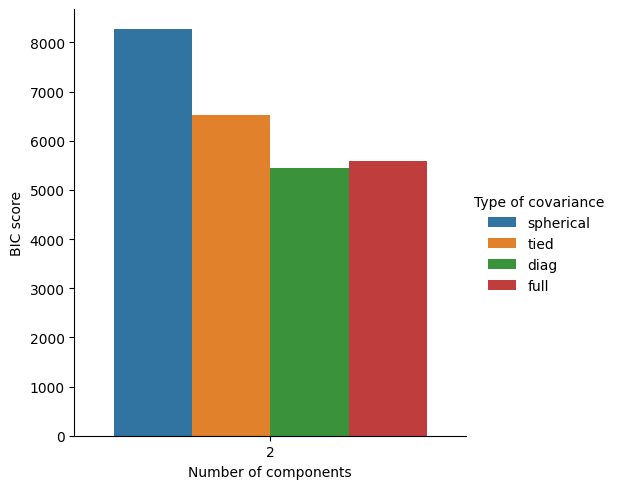

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [ ]:
y_test.replace('tested_negative', 0,inplace=True)
y_test.replace('tested_positive',1,inplace=True)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[73, 77],
       [33, 48]])

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.5238095238095238, 0.384, 0.5925925925925926, 0.4660194174757281)

According to the Metrics (Accuracy, Precision, Recall, F1-score) and the BIC: the optimized GaussianMixture Model is more effective than the first model GMM_model.
* **GridSearch MODEL** = (0.5238095238095238, 0.384, 0.5925925925925926, 0.4660194174757281)
* **GMM_MODEL**=  (0.47619047619047616,
 0.3113207547169811,
 0.4074074074074074,
 0.3529411764705882)

**Interpretation:** Given the diabetes dataset is moderately imbalanced,  we see the performance of the GM on `diabetes` dataset poor to average. Even if a certain trade-off between `accuracy` and `recall` was reached. Due to the modest performance of EM in the `diabetes` data, taking in consideration that  `surgical complications` and `Marketing Campaign`are severely imbalanced  datasets, we expect poor very low classification performance on both.

# **4. Comparative Analysis**



* Here we compare the results obtained from the built semi-supervised models, to be able to better derive conclusions on their performance

* Generally the Self-training method yielded better results than the Expectation Maximization on the Diabetes dataset.

* The Self-training algorithm was impacted by the class imbalance issue, and released lower performance on datasets with severe class imbalance

* Although the performance of self-training algorithm was negatively influenced by the class imbalance,  it exceeded the EM algorithm, which was more impacted by the class imbalanced and provided lower performance

* The class imbalanced data issue is a critical problem in semi-supervised learning, from the experimental work, we see its effect on the methods of  algorithm based approach, in particular: EM and Selftraining

* Further optimization of the employed methods could improve the results, however, better adapted methods to the severe class imbalance could be proposed.



# **5. Conclusiones**





* **Data Preprocessing:** we experimented with the two options, implementation of a semisupervised algorithm and comparison of semi-supervised algorithms on three datasets. Three public datasets were used: `Surgical complication` , `Marketing campaign` , and `diabetes`. All the employed datasets have an imbalanced class distribution, however the first two datasets suffer from a severe class imbalance. Necessary preprocessing procedures like dealing with missing values, feature selection, feature transformation were performed in the datasets. We split the data into train and test. Then, a percentage of the labels of the training data was removed to transform them into semi-labeled.

* **Experimental Procedures:** In the first part, we implemented a selftraining algorithm based on the logistic regression classifier. The implemented algorithm was applied on the `Surgical complication` dataset, and yield good results. In the second part, the comparison involved experimenting with the  selftraining algorithm of `sklearn` on the three datasets and applying the `Expectation-Maximization` on the `diabetes` dataset. Evaluation of each built method on the test subset was carried out, using a set of metrics like: `accuracy`, `recall`, `precision`, `f1-score`, and `area under the ROC curve`, further optimization for the `EM` method was realized using `gridsearch`.

* **Conclusiones:** We conclude the superior performance of the selftraining algorithm over the `EM` method, besides the deterioration of the performance of the selftraining algorithm due to the class imbalance issue. Nevertheless, the class imbalance impacted the `EM` more than the `Self-training` algorithm. For that, we proposed an evolutionary method to optimize the semi-supervised learning in particular the `Selftraining` algorithm, which is further explained in the future research directions

# **References**

https://www.kaggle.com/code/ryomiyazaki/semi-supervised-gaussian-mixture-model-with-em


https://pages.cs.wisc.edu/~jerryzhu/pub/sslchicago09.pdf

https://www.isprs.org/proceedings/xxxviii/4-w10/papers/VCGVA2009_09018_Xiong.pdf

https://github.com/mwdunham/ssGMM

https://towardsdatascience.com/a-gentle-introduction-to-self-training-and-semi-supervised-learning-ceee73178b38